In [89]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [84]:
def train(model, train_data, valid_data, optimizer, criterion, n_epoch):
    
    train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
    
    for epoch in range(n_epoch):
        
        train_loss, train_acc, val_loss, val_acc = 0, 0, 0, 0

        # ----- TRAIN -----
        model.train()
        # ----- batch_sizeごとに処理 -----
        for inputs, labels in dataloader_train:
            optimizer.zero_grad()# 勾配の初期化
            
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            _, predictions = torch.max(outputs, 1)
                
            train_loss += loss.item() * inputs.size(0)
            train_acc += torch.sum(predictions == labels.data)
            loss.backward()
            optimizer.step()
        
        avg_train_loss = train_loss / len(dataloader_train.dataset)
        avg_train_acc = train_acc / len(dataloader_train.dataset)
        

        # ----- TEST -----
        model.eval()
        for inputs, labels in dataloader_valid:
            
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            _, val_prediction = torch.max(outputs, 1)
            
            val_loss += loss.item() * inputs.size(0)
            val_acc += torch.sum(val_prediction == labels.data)
        
        avg_val_loss = val_loss / len(dataloader_valid.dataset)
        avg_val_acc = val_acc / len(dataloader_valid.dataset)
        print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
               .format(epoch+1, n_epoch, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
        train_loss_list.append(avg_train_loss)
        train_acc_list.append(avg_train_acc)
        val_loss_list.append(avg_val_loss)
        val_acc_list.append(avg_val_acc)
        
        # ----- PLOT -----
    plt.plot(train_loss_list)
    plt.show()
    plt.plot(val_loss_list)
    plt.show()
    plt.plot(val_acc_list)
    plt.show()
        
def eval(model, test_dataloader):
    test_loss = 0
    test_cor = 0
    
    model.eval()
    for inputs, labels in test_dataloader:
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        _, test_prediction = torch.max(outputs, 1)
            
        test_loss += loss.item() * inputs.size(0)
        test_cor += torch.sum(test_prediction == labels.data)
      
    test_loss = test_loss / len(test_dataloader.dataset)
    test_acc = test_cor.double() / len(test_dataloader.dataset)
    return test_loss, test_acc    

In [85]:
data_transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    ])


train_dataset = datasets.FashionMNIST(
    root="datasets", train=True, transform=data_transform, download=True
)

nb_train = int(0.8 * len(train_dataset))
nb_valid = int(0.2 * len(train_dataset))

train_dataset, val_dataset = torch.utils.data.dataset.random_split(train_dataset, [nb_train, nb_valid])

dataloader_train = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=512,
    shuffle=True,
)
dataloader_valid = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True
)


test_dataset = datasets.FashionMNIST(
    root="datasets",
    train=False,
    transform=data_transform,
    download=True,
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=256,
    shuffle=True,
)

Epoch [1/100], Loss: 2.2998, val_loss: 2.2964, val_acc: 0.1517
Epoch [2/100], Loss: 2.2884, val_loss: 2.2737, val_acc: 0.2848
Epoch [3/100], Loss: 2.2105, val_loss: 2.1187, val_acc: 0.4296
Epoch [4/100], Loss: 2.0428, val_loss: 1.9830, val_acc: 0.5408
Epoch [5/100], Loss: 1.9523, val_loss: 1.9268, val_acc: 0.5584
Epoch [6/100], Loss: 1.9083, val_loss: 1.8890, val_acc: 0.5801
Epoch [7/100], Loss: 1.8675, val_loss: 1.8448, val_acc: 0.6659
Epoch [8/100], Loss: 1.8254, val_loss: 1.8066, val_acc: 0.6956
Epoch [9/100], Loss: 1.7910, val_loss: 1.7758, val_acc: 0.7183
Epoch [10/100], Loss: 1.7652, val_loss: 1.7553, val_acc: 0.7323
Epoch [11/100], Loss: 1.7490, val_loss: 1.7425, val_acc: 0.7393
Epoch [12/100], Loss: 1.7381, val_loss: 1.7342, val_acc: 0.7435
Epoch [13/100], Loss: 1.7297, val_loss: 1.7255, val_acc: 0.7505
Epoch [14/100], Loss: 1.7225, val_loss: 1.7185, val_acc: 0.7565
Epoch [15/100], Loss: 1.7160, val_loss: 1.7135, val_acc: 0.7600
Epoch [16/100], Loss: 1.7102, val_loss: 1.7075, v

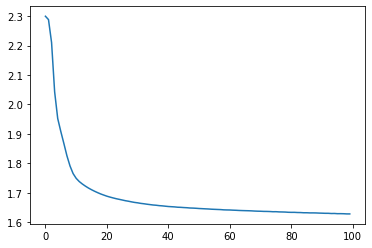

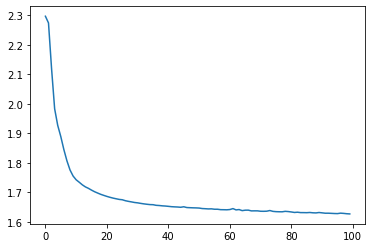

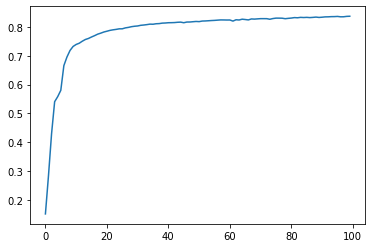

In [86]:
class LeNet(nn.Module):
 
    def __init__(self, input_size, output_size):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_size, 6, kernel_size=5, padding=2),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Tanh(),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Tanh(),
            nn.Conv2d(16, 120, kernel_size=5),
            nn.Tanh(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10),
            nn.Softmax(),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = nn.Flatten()(x)
        x = self.classifier(x)
        return x

    
model = LeNet(1, 10)

num_epochs = 100
lr=0.1
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
h = train(model, dataloader_train, dataloader_valid, optimizer, criterion, num_epochs)

Epoch [1/100], Loss: 2.3031, val_loss: 2.3028, val_acc: 0.0996
Epoch [2/100], Loss: 2.3028, val_loss: 2.3027, val_acc: 0.1000
Epoch [3/100], Loss: 2.3027, val_loss: 2.3026, val_acc: 0.1011
Epoch [4/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [5/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [6/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [7/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [8/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [9/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [10/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [11/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [12/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [13/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [14/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [15/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.1011
Epoch [16/100], Loss: 2.3026, val_loss: 2.3026, v

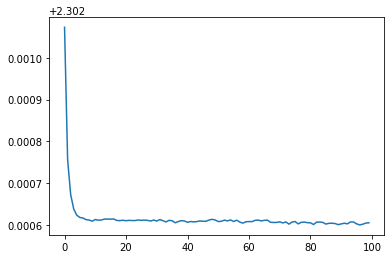

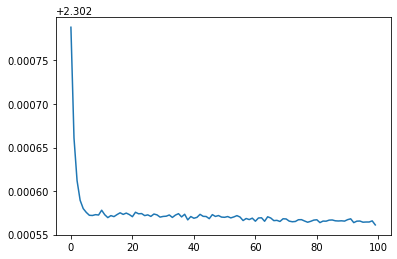

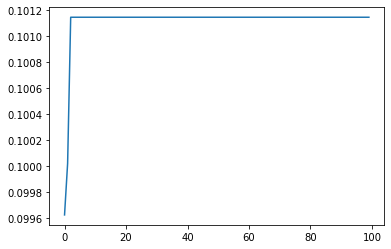

In [92]:
class LeNet(nn.Module):
 
    def __init__(self, input_size, output_size):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_size, 6, kernel_size=5, padding=2),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Sigmoid(),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Sigmoid(),
            nn.Conv2d(16, 120, kernel_size=5),
            nn.Sigmoid(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10),
            nn.Softmax(),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = nn.Flatten()(x)
        x = self.classifier(x)
        return x

    
model = LeNet(1, 10)

num_epochs = 100
lr=0.2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
h = train(model, dataloader_train, dataloader_valid, optimizer, criterion, num_epochs)

In [ ]:
test_loss, test_acc = eval(model, test_dataloader)
print(f'Loss: {test_loss} Accuracy: {test_acc * 100}')

In [78]:
data_transform = transforms.Compose([
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    ])


train_dataset = datasets.FashionMNIST(
    root="datasets", train=True, transform=data_transform, download=True
)

nb_train = int(0.8 * len(train_dataset))
nb_valid = int(0.2 * len(train_dataset))

train_dataset, val_dataset = torch.utils.data.dataset.random_split(train_dataset, [nb_train, nb_valid])

dataloader_train = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=512,
    shuffle=True,
)
dataloader_valid = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True
)


test_dataset = datasets.FashionMNIST(
    root="datasets",
    train=False,
    transform=data_transform,
    download=True,
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=256,
    shuffle=True,
)

Epoch [1/100], Loss: 2.3026, val_loss: 2.3026, val_acc: 0.0999


KeyboardInterrupt: 

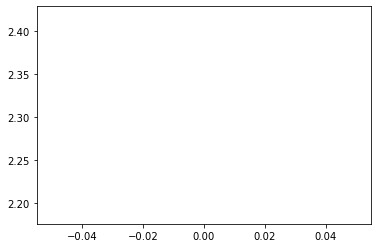

In [79]:
class AlexNet(nn.Module):
 
    def __init__(self, input_size=3, output_size=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_size, 96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(5*5*256, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10),
            nn.Softmax(),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = nn.Flatten()(x)
        x = self.classifier(x)
        return x

    
model = AlexNet(1, 10)

num_epochs = 100
lr=0.1
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
h = train(model, dataloader_train, dataloader_valid, optimizer, criterion, num_epochs)

Epoch [100/100], Loss: 1.5356, val_loss: 1.5258, val_acc: 0.9358

test Loss: 1.5656318424224853 Accuracy: 89.54

In [ ]:
data_transform = transforms.Compose([
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    ])


train_dataset = datasets.FashionMNIST(
    root="datasets", train=True, transform=data_transform, download=True
)

nb_train = int(0.8 * len(train_dataset))
nb_valid = int(0.2 * len(train_dataset))

train_dataset, val_dataset = torch.utils.data.dataset.random_split(train_dataset, [nb_train, nb_valid])

dataloader_train = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=512,
    shuffle=True,
)
dataloader_valid = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True
)


test_dataset = datasets.FashionMNIST(
    root="datasets",
    train=False,
    transform=data_transform,
    download=True,
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=256,
    shuffle=True,
)

In [ ]:
class VGG(nn.Module):
 
    def __init__(self, input_size=3, output_size=10):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_size, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10),
            nn.Softmax(),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = nn.Flatten()(x)
        x = self.classifier(x)
        return x

    
model = VGG(1, 10)

num_epochs = 100
lr=0.1
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
h = train(model, dataloader_train, dataloader_valid, optimizer, criterion, num_epochs)